In [1]:
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

X = boston.data
Y = boston.target

In [3]:
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [4]:
import pandas as pd
df = pd.DataFrame(X,columns = boston.feature_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [7]:
#Normalise the dataset
import numpy as np
u = np.mean(X,axis=0)
std = np.std(X,axis=0)
print(u.shape,std.shape)

(13,) (13,)


In [8]:
# Normalise the dataset
X = (X-u)/std

In [9]:
df = pd.DataFrame(X,columns = boston.feature_names)
df.head(n=5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


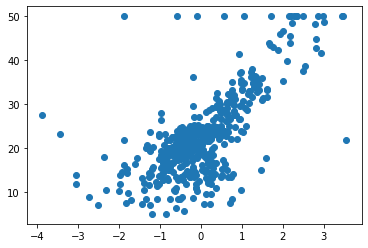

In [10]:
import matplotlib.pyplot as plt
plt.scatter(df['RM'],Y)
plt.show()

In [11]:
one = np.ones((X.shape[0],1))
X = np.hstack((one,X))
X[:4,:4]

array([[ 1.        , -0.41978194,  0.28482986, -1.2879095 ],
       [ 1.        , -0.41733926, -0.48772236, -0.59338101],
       [ 1.        , -0.41734159, -0.48772236, -0.59338101],
       [ 1.        , -0.41675042, -0.48772236, -1.30687771]])

In [45]:
def hypothesis(x,theta):
    y_ = 0.0
    for i in range(x.shape[0]):
        y_ += (x[i]*theta[i])
    return y_

def gradient(X,Y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    for j in range(n):
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            grad[j] += (y_-Y[i])*X[i][j]
    
    return grad/m
    
def error(X,Y,theta):
    e = 0.0
    for i in range(X.shape[0]):
        y_ = hypothesis(X[i],theta)
        e += ((Y[i]-y_)**2)
    return e/X.shape[0]

def gradientDescent(X,Y,max_steps=300,learning_rate = 0.1):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
            
    return theta,error_list
    

In [50]:
import time
start = time.time()
theta,error_list = gradientDescent(X,Y)
end = time.time()
print("Time Taken is : ",end-start)

Time Taken is :  45.096991539001465


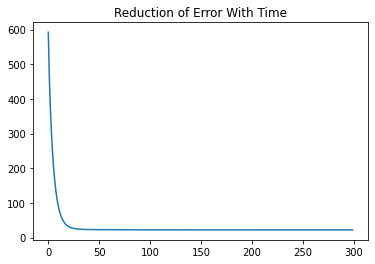

In [51]:
plt.plot(error_list)
plt.title("Reduction of Error With Time")
plt.show()

## <font color ="green">Predictions</font>

In [54]:
y_ = []
for i in range(X.shape[0]):
    y_.append(hypothesis(X[i],theta))

In [56]:
y_ = np.array(y_)

In [72]:
def r2_score(Y,y_):
    score = 1 - (np.sum((Y-y_)**2)/np.sum((np.mean(Y)-Y)**2))
    return score

In [73]:
print(r2_score(Y,y_)*100)

74.04541323942743


## <font color="green"> Optimisisng Code using Vectorization </font>

In [75]:
def hypothesis(x,theta):
    return np.dot(x,theta)

def gradient(X,Y,theta):
    m,n = X.shape
    grad = np.zeros((n,))
    y_ = hypothesis(X,theta)
    grad = np.dot(X.T,(y_-Y))
    return grad/m
    
def error(X,Y,theta):
    y_ = hypothesis(X,theta)
    e = np.sum((Y-y_)**2)
    return e/X.shape[0]

def gradientDescent(X,Y,max_steps=300,learning_rate = 0.1):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    for i in range(max_steps):
        grad = gradient(X,Y,theta)
        e = error(X,Y,theta)
        error_list.append(e)
        theta = theta - learning_rate*grad
            
    return theta,error_list
    

In [81]:
start =  time.time()
theta,error_list = gradientDescent(X,Y)
end = time.time()
print("Time taken is: ",end-start)

Time taken is:  0.028998374938964844


In [82]:
y_ = hypothesis(X,theta)

In [83]:
y_ = np.array(y_)

In [84]:
y_

array([30.18633694, 24.99095484, 30.56568098, 28.6220126 , 27.9619464 ,
       25.24452832, 22.96581931, 19.4959112 , 11.48031987, 18.87883585,
       18.97129884, 21.54039453, 20.89285327, 19.60128149, 19.32367393,
       19.3458686 , 20.59832729, 16.95783793, 16.23493881, 18.44548854,
       12.55479461, 17.70925422, 15.88547043, 13.84190443, 15.71570947,
       13.4205508 , 15.49775358, 14.75818241, 19.59955913, 20.93977682,
       11.49745095, 18.09361635,  8.88301038, 14.31610222, 13.75983633,
       23.77730951, 22.30988941, 23.08772244, 22.90940545, 31.27562517,
       34.14934567, 27.99150715, 25.15161107, 24.56195221, 22.86665722,
       22.01299699, 20.35079995, 17.94239765,  9.0032359 , 17.10959314,
       21.16463059, 23.8404942 , 27.56319999, 23.94281148, 15.70766609,
       30.96324445, 24.93746243, 32.91466583, 21.63293708, 20.92400291,
       17.6977369 , 18.32617385, 23.82616369, 22.4283064 , 23.34895856,
       30.37522177, 25.5255783 , 21.2306401 , 17.52571154, 20.89

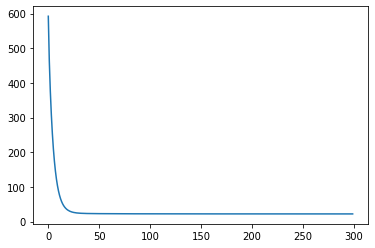

In [85]:
plt.plot(error_list)
plt.show()

In [87]:
print(r2_score(Y,y_)*100)

74.04541323942743
